# klassificering kvaliteten på viner.
notebook för träning av RandomForestClassifier modell för att predictera kvaliteten på viner.

In [2]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score
from collections import Counter



In [3]:
data_df = pd.read_csv("/Users/ahmadzarzar/Downloads/csv_hämtade_filer/WineQT.csv")

In [4]:
data_df.head(1143)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


## Data analys 

dataset innehåller 1143 datapunkter och 13 attributer

In [5]:
data_df.shape

(1143, 13)

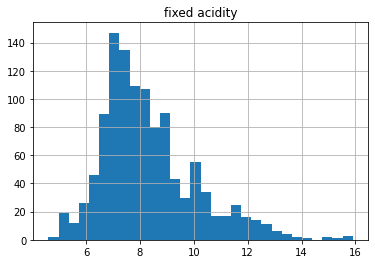

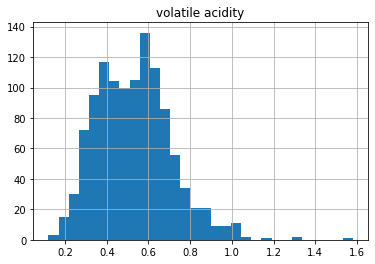

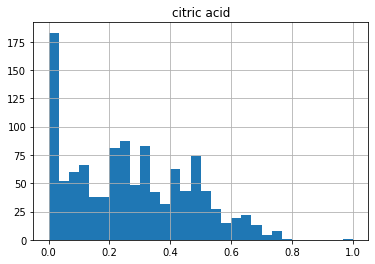

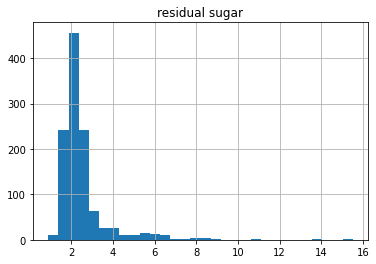

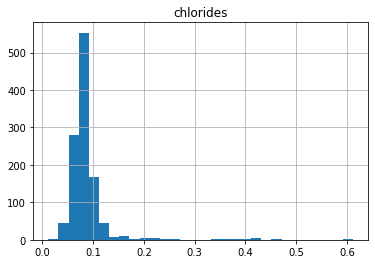

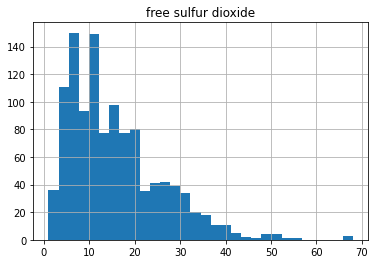

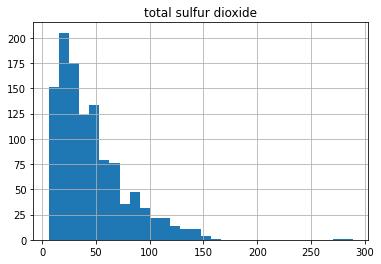

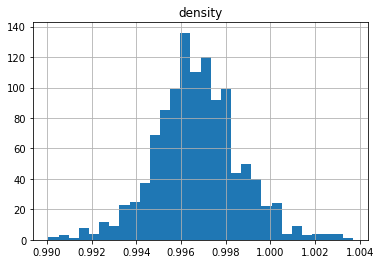

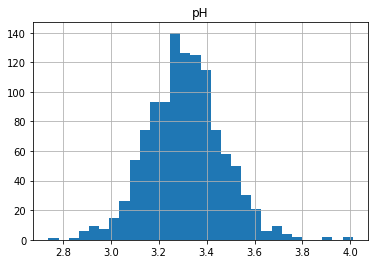

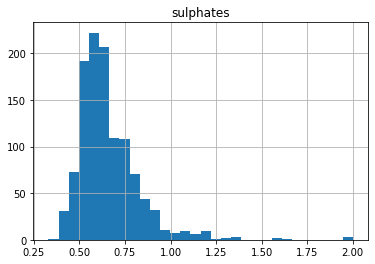

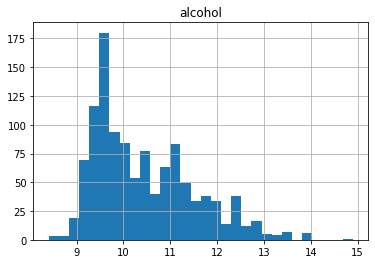

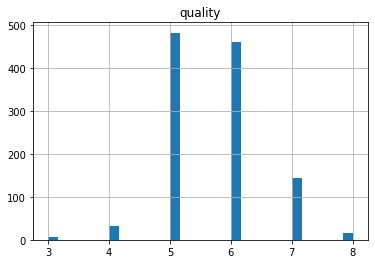

In [6]:
fethchar_list=[['fixed acidity'],['volatile acidity'],['citric acid'],['residual sugar'],['chlorides'],
['free sulfur dioxide'],['total sulfur dioxide'],['density'],['pH']
,['sulphates'],['alcohol'],['quality']]

for x in fethchar_list:
    data_df[x].hist(bins=30)


## Skapa träning/test data 
Target:quality

In [7]:
x,y=data_df.drop(columns=['quality','Id'],) , data_df.quality 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=42)

### Träning RandomForestClassifier modell 

In [8]:
random_forest= RandomForestClassifier(random_state=0)

random_forest.fit(x_train,y_train)

test=random_forest.score(x_test,y_test)

pred= random_forest.predict(x_test)


print(test)






0.6855895196506551


### Hur många träd finns det i skogen?

In [9]:
print(f'Det är {random_forest.n_estimators} träd')

Det är 100 träd


<AxesSubplot:>

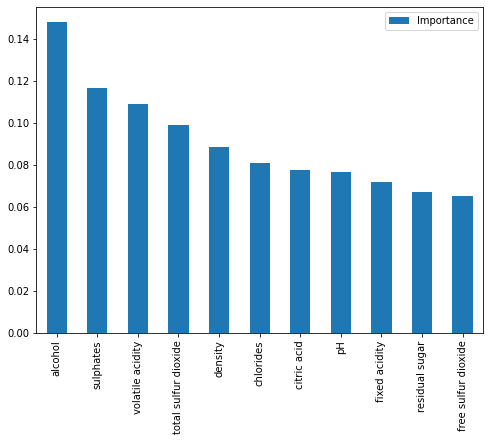

In [10]:
feat_importances = pd.DataFrame(random_forest.feature_importances_, index=x.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))


In [11]:
print(feat_importances)

                      Importance
alcohol                 0.147906
sulphates               0.116609
volatile acidity        0.109036
total sulfur dioxide    0.099024
density                 0.088407
chlorides               0.081138
citric acid             0.077456
pH                      0.076624
fixed acidity           0.071691
residual sugar          0.066974
free sulfur dioxide     0.065135


### Vilka klasser är det den modellen har störst problem med att klassificera rätt? Varför
### är det problem med de klasserna?

In [12]:
confusion_matrix(pred,y_test)

array([[ 0,  0,  0,  0,  0],
       [ 3, 77, 31,  0,  0],
       [ 3, 18, 63,  9,  2],
       [ 0,  1,  5, 17,  0],
       [ 0,  0,  0,  0,  0]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


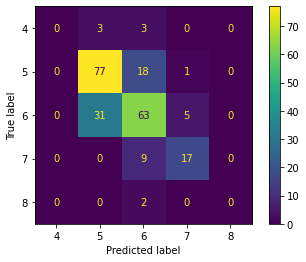

In [13]:
plot_confusion_matrix(random_forest, x_test, y_test)  
plt.show()


 Varför? för att värden som vi fick genom confusion_matrix på dessa klasser den visar oss genom att vi tiitar på predicted label dvs x axeln på klass 5 så den har första värde 31 samtidigt kolar vi på y axeln så ser vi att 31 ligger på klass 6 och och det felaktig därför har modullen problem med de klasserna att kalssificera och så kan vi kolla på resten av värden som är kvar.

## Skapa träning/test data 
Target:quality

In [14]:

data_bortagen_attrobut=data_df.drop(columns=['quality','Id'])
x,y=data_bortagen_attrobut, data_df.quality 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=42)

## Träning egen RandomForestClassifier modell 

In [15]:

attribut_lista=[['fixed acidity','volatile acidity','citric acid'],
                ['residual sugar','chlorides','free sulfur dioxide'],
                ['total sulfur dioxide','density','pH'],
                ['sulphates','alcohol']]

lisat_socr=[]


for i in attribut_lista:

    diction_tree= DecisionTreeClassifier(random_state=42)
    träd=diction_tree.fit(x_train[i],y_train)
    predi=träd.predict(x_test[i])
    lisat_socr.append(predi)
        
ny_lisat_so=[] 

lisat_socr= np.array(lisat_socr)
lisat_socr=lisat_socr.transpose()
lisat_socr

for x in lisat_socr:
    c=Counter(x)
    c.most_common()
    value, count = c.most_common()[0]  
    ny_lisat_so.append(value)    

    



### Hur många träd har du i skogen?

In [16]:
def antal_trad(lista):
    return len(lista)


print(f'Det är {antal_trad(attribut_lista)} träd')  



Det är 4 träd


# Jämföralse testscore

### Vad får du för testscore? Skiljer den sig mot modellen du skapade i godkänt
### delen? I så fall, varför tror du den skiljer sig?

In [17]:

def accuracy (y_true,y_pred):
    return np.sum(y_true == y_pred)/ len(y_true)


print(f'Test score från Randomforest {test}')

print(f'Test score från egen Randomforest {accuracy(y_test,ny_lisat_so)}') 




Test score från Randomforest 0.6855895196506551
Test score från egen Randomforest 0.5720524017467249


Ja det skiljer sig mot modellen jag skapade i godkänt delen då fick jag som jag visar 0.68 och resultatet från egen modellen är 0.57 så det skiljer sig.

Varför? det beror på oss hur vi tänker när vi väljer hur många decision trees vår modell ska träna på, dvs om vi väljer att träna vår modell randomforest på (x) antal träd så hög det antalet så högre test score vi får, så i det fallet antal decision trees som gör att resultatet att det skiljer sig.

### Vilka klasser har modellen problem med? Är det samma klasser som för
### modellen i godkänt delen?

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


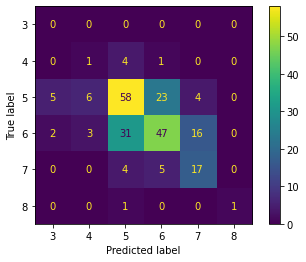

In [18]:
plot_confusion_matrix(diction_tree,x_test[i],y_test)  
plt.show()


Nej det är inte samma klasser som förra modellen i godkänt delen dessa är annorlunda klasser, förra modellen fick vi 77,18,31,63 men i min egen modell fick jag 58,23,31,47,16,17 så klsserna blev annorlunda i egen randomforest.